In [2]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [3]:
terror_df = pd.read_csv('globalterrorism.csv',encoding = "latin1")

In [4]:
terror_df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2.017120e+11,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,2.017120e+11,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,2.017120e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,2.017120e+11,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


# Understanding the Data

In [5]:
terror_df.shape

(181691, 135)

In [6]:
terror_df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002704e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325955e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991020e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009020e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014080e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017120e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
terror_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
terror_df.dtypes

eventid       float64
iyear           int64
imonth          int64
iday            int64
approxdate     object
               ...   
INT_LOG         int64
INT_IDEO        int64
INT_MISC        int64
INT_ANY         int64
related        object
Length: 135, dtype: object

In [9]:
terror_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType',
                       'target1':'Target','nkill':'Killed','nwound':'Wounded','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','city':'City'},inplace = True)

In [10]:
# percentage of missing values in our dataset
missing_values = (((terror_df.isnull().sum()).sum())/terror_df.size)*100
missing_values

56.481718962414206

In [11]:
# creating dataframe with necessary columns only
terr_df = terror_df[['Year','Month','Day','Country','state','Region','City','AttackType','Killed',
              'Wounded','Group','Target','Target_type','Weapon_type']]
terr_df.head(10)

,Year,Month,Day,Country,state,Region,City,AttackType,Killed,Wounded,Group,Target,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,Assassination,1.0,0.0,MANO-D,Julio Guzman,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,Hostage Taking (Kidnapping),0.0,0.0,23rd of September Communist League,"Nadine Chaval, daughter",Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,Assassination,1.0,0.0,Unknown,Employee,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,Bombing/Explosion,NaN,NaN,Unknown,U.S. Embassy,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,Facility/Infrastructure Attack,NaN,NaN,Unknown,U.S. Consulate,Government (Diplomatic),Incendiary
5,1970,1,1,United States,Illinois,North America,Cairo,Armed Assault,0.0,0.0,Black Nationalists,Cairo Police Headquarters,Police,Firearms
6,1970,1,2,Uruguay,Montevideo,South America,Montevideo,Assassination,0.0,0.0,Tupamaros (Uruguay),Juan Maria de Lucah/Chief of Directorate of in...,Police,Firearms
7,1970,1,2,United States,California,North America,Oakland,Bombing/Explosion,0.0,0.0,Unknown,Edes Substation,Utilities,Explosives
8,1970,1,2,United States,Wisconsin,North America,Madison,Facility/Infrastructure Attack,0.0,0.0,New Year's Gang,"R.O.T.C. offices at University of Wisconsin, M...",Military,Incendiary
9,1970,1,3,United States,Wisconsin,North America,Madison,Facility/Infrastructure Attack,0.0,0.0,New Year's Gang,Selective Service Headquarters in Madison Wisc...,Government (General),Incendiary


In [12]:
for i in terr_df.columns:
    print(i,terr_df[i].nunique())


Year 47
Month 13
Day 32
Country 205
state 2855
Region 12
City 36674
AttackType 9
Killed 205
Wounded 238
Group 3537
Target 86006
Target_type 22
Weapon_type 12


In [13]:
terr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   AttackType   181691 non-null  object 
 8   Killed       171378 non-null  float64
 9   Wounded      165380 non-null  float64
 10  Group        181691 non-null  object 
 11  Target       181055 non-null  object 
 12  Target_type  181691 non-null  object 
 13  Weapon_type  181691 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 19.4+ MB


In [14]:
terr_df['Wounded'] = terr_df['Wounded'].fillna(0).astype(int)
terr_df['Killed'] = terr_df['Killed'].fillna(0).astype(int)

In [15]:
terr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Year         181691 non-null  int64 
 1   Month        181691 non-null  int64 
 2   Day          181691 non-null  int64 
 3   Country      181691 non-null  object
 4   state        181270 non-null  object
 5   Region       181691 non-null  object
 6   City         181257 non-null  object
 7   AttackType   181691 non-null  object
 8   Killed       181691 non-null  int32 
 9   Wounded      181691 non-null  int32 
 10  Group        181691 non-null  object
 11  Target       181055 non-null  object
 12  Target_type  181691 non-null  object
 13  Weapon_type  181691 non-null  object
dtypes: int32(2), int64(3), object(9)
memory usage: 18.0+ MB


# cleaned data

In [16]:


terr_df.head(10)

,Year,Month,Day,Country,state,Region,City,AttackType,Killed,Wounded,Group,Target,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,Assassination,1,0,MANO-D,Julio Guzman,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,Hostage Taking (Kidnapping),0,0,23rd of September Communist League,"Nadine Chaval, daughter",Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,Assassination,1,0,Unknown,Employee,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,Bombing/Explosion,0,0,Unknown,U.S. Embassy,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,Facility/Infrastructure Attack,0,0,Unknown,U.S. Consulate,Government (Diplomatic),Incendiary
5,1970,1,1,United States,Illinois,North America,Cairo,Armed Assault,0,0,Black Nationalists,Cairo Police Headquarters,Police,Firearms
6,1970,1,2,Uruguay,Montevideo,South America,Montevideo,Assassination,0,0,Tupamaros (Uruguay),Juan Maria de Lucah/Chief of Directorate of in...,Police,Firearms
7,1970,1,2,United States,California,North America,Oakland,Bombing/Explosion,0,0,Unknown,Edes Substation,Utilities,Explosives
8,1970,1,2,United States,Wisconsin,North America,Madison,Facility/Infrastructure Attack,0,0,New Year's Gang,"R.O.T.C. offices at University of Wisconsin, M...",Military,Incendiary
9,1970,1,3,United States,Wisconsin,North America,Madison,Facility/Infrastructure Attack,0,0,New Year's Gang,Selective Service Headquarters in Madison Wisc...,Government (General),Incendiary


# Univariate Analysis

In [17]:

terr_df['AttackType'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

In [18]:
(terr_df['AttackType'].value_counts()/terr_df.shape[0])*100

Bombing/Explosion                      48.574228
Armed Assault                          23.484377
Assassination                          10.629035
Hostage Taking (Kidnapping)             6.141196
Facility/Infrastructure Attack          5.699787
Unknown                                 4.004601
Unarmed Assault                         0.558641
Hostage Taking (Barricade Incident)     0.545432
Hijacking                               0.362704
Name: AttackType, dtype: float64

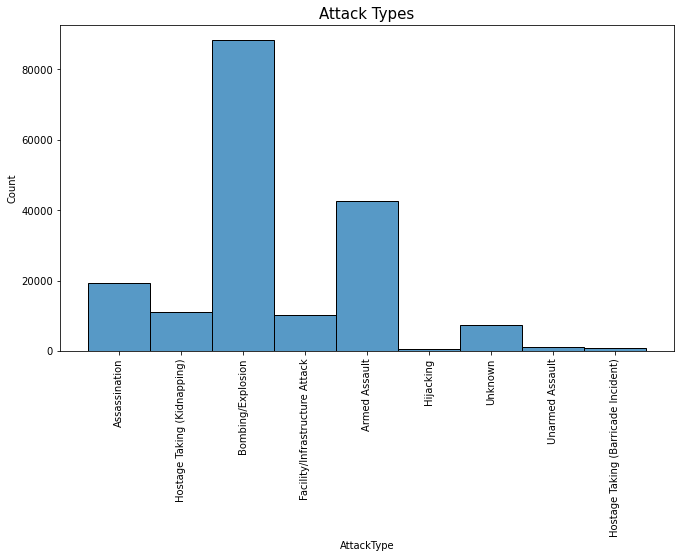

In [19]:
# 10 most attacked targets

plt.figure(figsize = (11,6))
sns.histplot(terr_df['AttackType'], palette='cubehelix')
plt.title('Attack Types',fontsize=15)
plt.xticks(rotation=90)
plt.show()

#As we can see most of the terrorists attackes were happened using explosives

# Top 10 countries which suffer most from Terrorist attacks

In [20]:
terr_df['Country'].value_counts()[:10]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

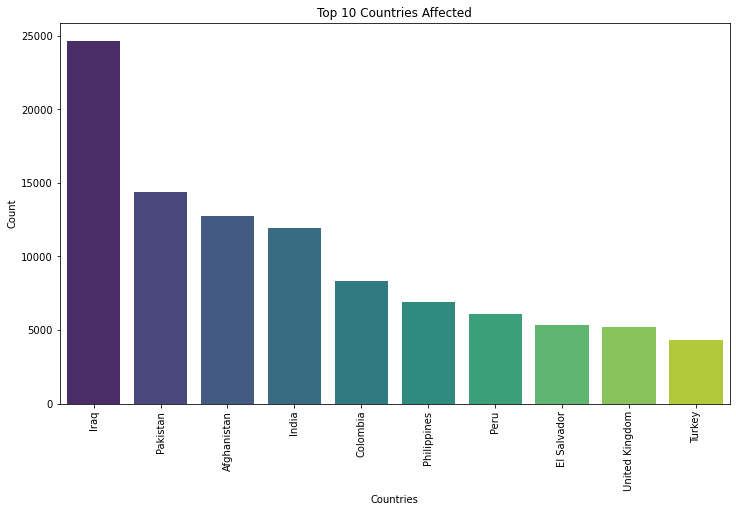

In [21]:
plt.figure(figsize=(12,7))
sns.barplot(terr_df['Country'].value_counts()[:10].index,terr_df['Country'].value_counts()[:10].values,palette='viridis')
plt.title('Top 10 Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

By above graph we can say that Iraq is the most affected country by terrorism followed by pakistan and afghanistan

In [22]:
(terr_df['Target_type'].value_counts().head(10)/terr_df['Target_type'].shape[0])*100

Private Citizens & Property       23.947801
Military                          15.401974
Police                            13.487735
Government (General)              11.713844
Business                          11.375907
Transportation                     3.742068
Utilities                          3.314969
Unknown                            3.246171
Religious Figures/Institutions     2.443709
Educational Institution            2.378764
Name: Target_type, dtype: float64

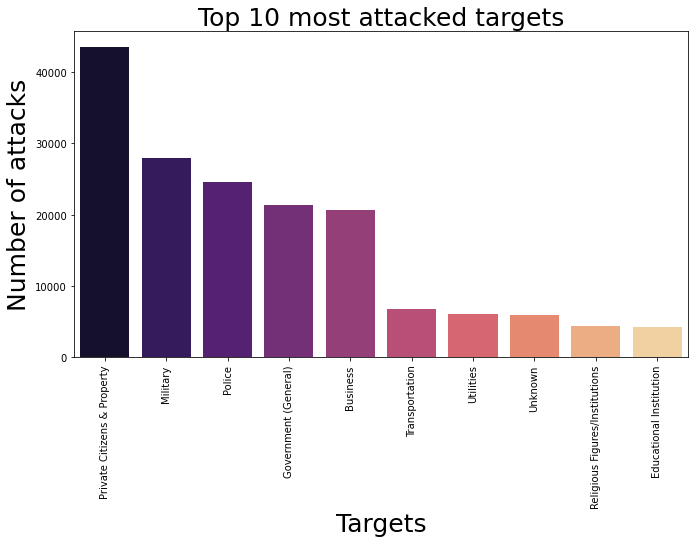

In [23]:
# 10 most attacked targets
plt.figure(figsize = (11,6))
sns.barplot(terr_df['Target_type'].value_counts().head(10).index, terr_df['Target_type'].value_counts().head(10).values, 
            palette='magma')
plt.title('Top 10 most attacked targets',fontsize=25)
plt.xlabel('Targets',fontsize=25)
plt.ylabel('Number of attacks',fontsize=25)
plt.xticks(rotation=90)
plt.show()

The most attcked target is Private citizens and property which is approximately 25%

10-20% is the target which is Military,police and Government

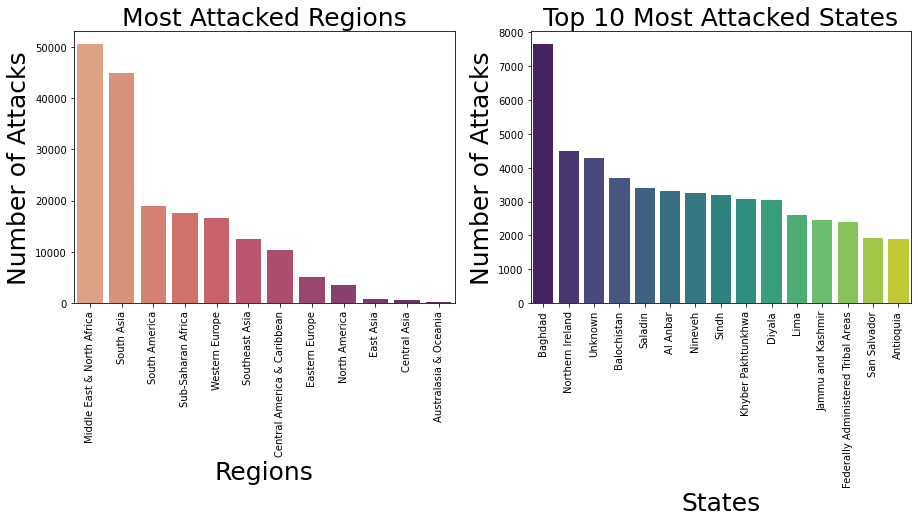

In [24]:
plt.subplot(1,2,1)
# regions with most attacks 
sns.barplot(terr_df['Region'].value_counts().index, terr_df['Region'].value_counts().values,palette='flare')
plt.title('Most Attacked Regions',fontsize=25)
plt.xlabel('Regions',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=25)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(terr_df['state'].value_counts().head(15).index, terr_df['state'].value_counts().head(15).values,palette='viridis')
plt.title('Top 10 Most Attacked States',fontsize=25)
plt.xlabel('States',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=25)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

Most attcked region is Middle East and North Africa

Most attcked state is Baghdad

In [25]:
(terr_df['Weapon_type'].value_counts().head()/terr_df['Weapon_type'].shape[0])*100

Explosives    50.869883
Firearms      32.210731
Unknown        8.342185
Incendiary     6.128537
Melee          2.011657
Name: Weapon_type, dtype: float64

Text(0, 0.5, 'Number of Weapon Used')

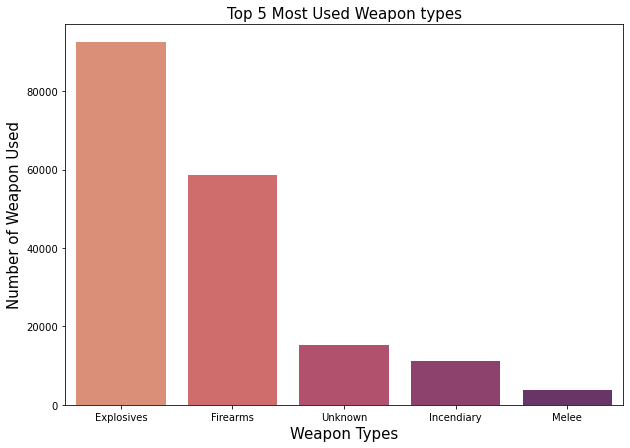

In [26]:
# Top 5 most used weapons types in terror attacks
plt.figure(figsize=(10,7))
sns.barplot(terr_df['Weapon_type'].value_counts().head().index, terr_df['Weapon_type'].value_counts().head().values,palette='flare')
plt.title('Top 5 Most Used Weapon types',fontsize=15)
plt.xlabel('Weapon Types',fontsize=15)
plt.ylabel('Number of Weapon Used',fontsize=15)



Almost 50% of Weapon used is 'Explosives' whereas 32% 'Firearms' used in the terrorism

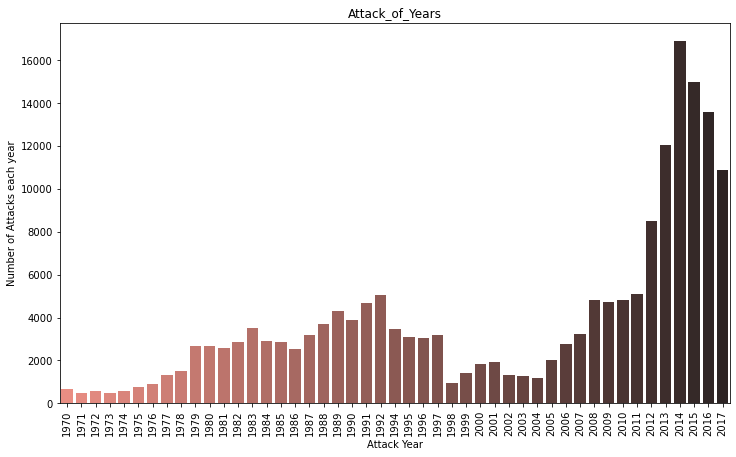

In [27]:
x_year = terr_df['Year'].unique()
y_count_years = terr_df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (12,7))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'dark:salmon_r')
plt.xticks(rotation = 90)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

2014 appears to be witness of a huge terrorist attacks

2014 onwards recorded a large increase in attacks of terrorism.

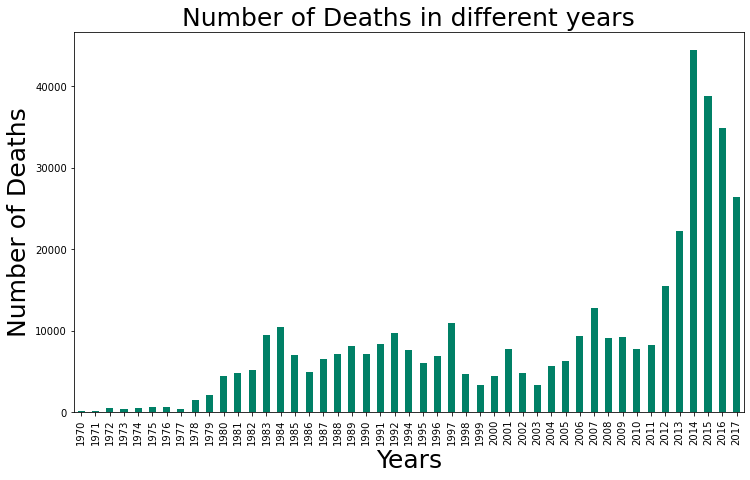

In [28]:
plt.figure(figsize = (12,7))
terr_df.groupby(['Year'])['Killed'].sum().plot(kind='bar',colormap='summer')
plt.title('Number of Deaths in different years',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.ylabel('Number of Deaths',fontsize=25)
plt.xticks(rotation=90)
plt.show()

Number of deaths caused by terrorism is more between 2014 and 2018, with on an average >50K people being killed. High peak went to 2014 with 45K+ deaths.

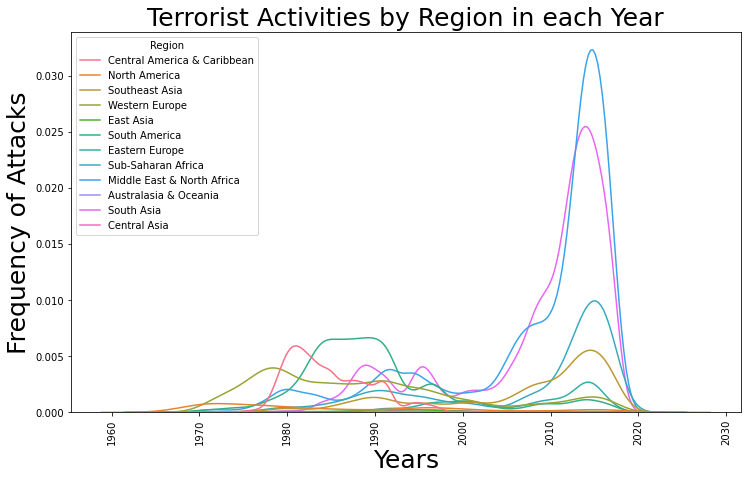

In [29]:
plt.figure(figsize = (12,7))
sns.kdeplot(terr_df['Year'], hue = terr_df['Region'])
plt.title('Terrorist Activities by Region in each Year',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.ylabel('Frequency of Attacks',fontsize=25)
plt.xticks(rotation=90)
plt.show()

# Bivariate Analysis

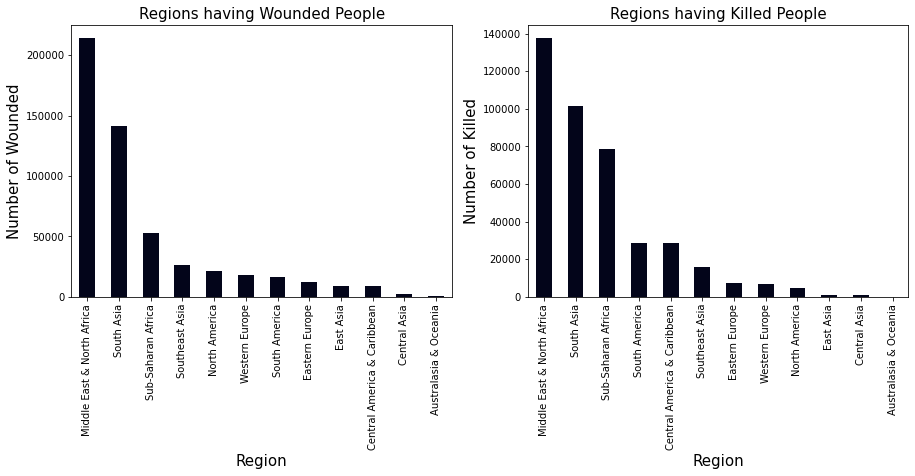

In [30]:
plt.subplot(1,2,1)

terr_df.groupby(['Region'])['Wounded'].sum().sort_values(ascending = False).plot(kind='bar',colormap='rocket')
plt.title('Regions having Wounded People',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Number of Wounded',fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
terr_df.groupby(['Region'])['Killed'].sum().sort_values(ascending = False).plot(kind='bar',colormap='rocket')
plt.title('Regions having Killed People',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Number of Killed',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

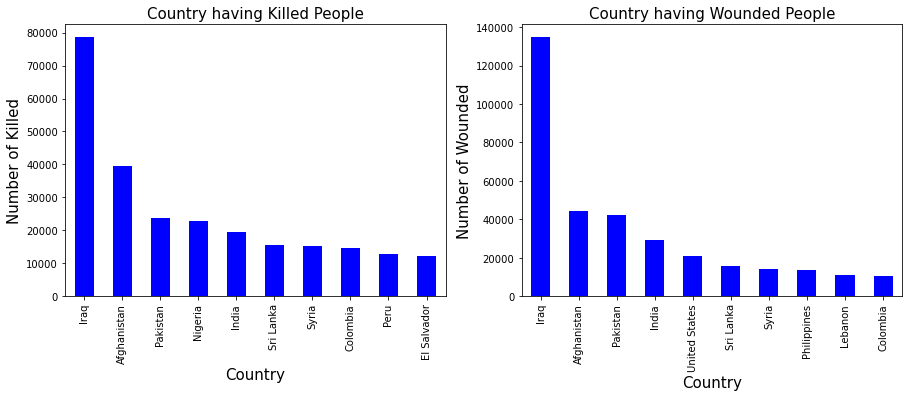

In [31]:
plt.subplot(1,2,2)

df1=terr_df.groupby(['Country'])['Wounded'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='winter')
plt.title('Country having Wounded People',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Wounded',fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,1)
terr_df.groupby(['Country'])['Killed'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='winter')
plt.title('Country having Killed People',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Killed',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

'Iraq' has the most Killed people (>70K) and wounded people (>1.2 lacs) Afganistan, pakistan and India all saw peak deaths while Iraq, which has overtaken all of these at the top of the table, suffered 37,700 more fatalities

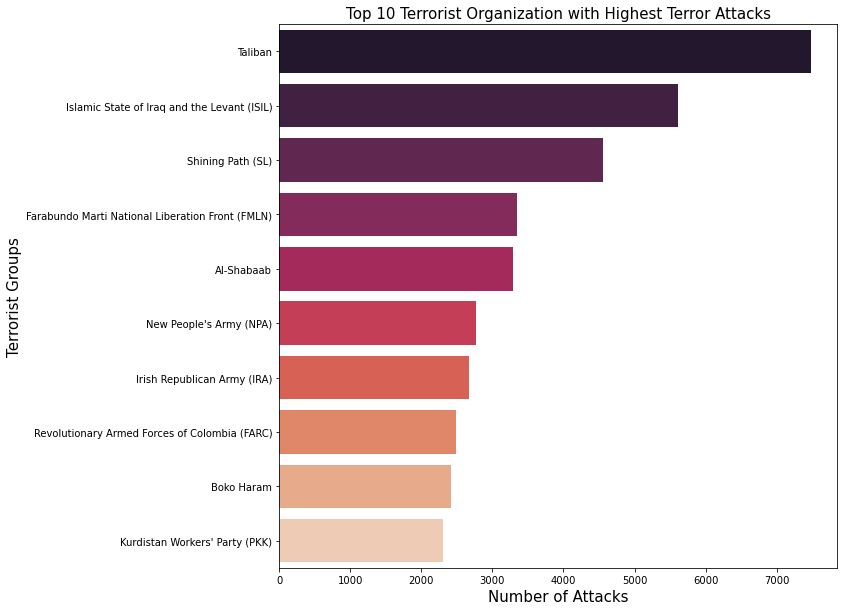

In [32]:
plt.figure(figsize=(10,10))
sns.barplot(terr_df['Group'].value_counts()[1:11].values, terr_df['Group'].value_counts()[1:11].index,palette='rocket')
plt.title('Top 10 Terrorist Organization with Highest Terror Attacks',fontsize=15)
plt.xlabel('Number of Attacks',fontsize=15)
plt.ylabel('Terrorist Groups',fontsize=15)
plt.show()

In [33]:
terr_df_tal = terr_df[terr_df.Group == 'Taliban']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '1995'),
  Text(1, 0, '2001'),
  Text(2, 0, '2002'),
  Text(3, 0, '2003'),
  Text(4, 0, '2004'),
  Text(5, 0, '2005'),
  Text(6, 0, '2006'),
  Text(7, 0, '2007'),
  Text(8, 0, '2008'),
  Text(9, 0, '2009'),
  Text(10, 0, '2010'),
  Text(11, 0, '2011'),
  Text(12, 0, '2012'),
  Text(13, 0, '2013'),
  Text(14, 0, '2014'),
  Text(15, 0, '2015'),
  Text(16, 0, '2016'),
  Text(17, 0, '2017')])

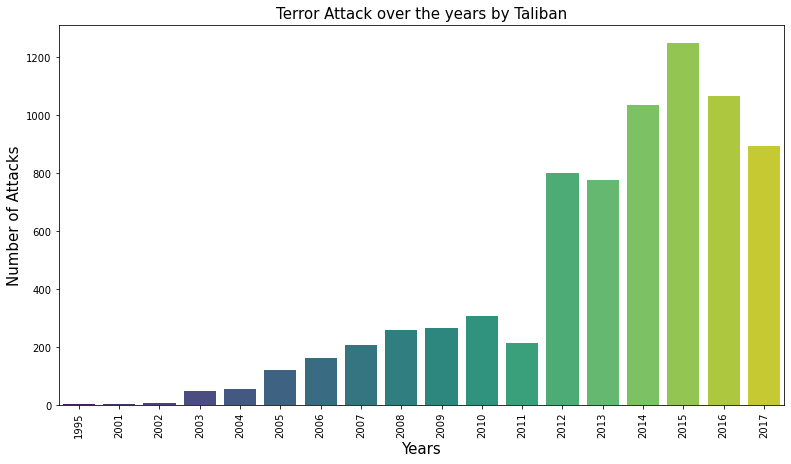

In [34]:
# Terror Attacks by Taliban over the Years
plt.figure(figsize = (13,7))
sns.barplot(terr_df_tal['Year'].value_counts().index,terr_df_tal['Year'].value_counts().values, palette = 'viridis')
plt.title('Terror Attack over the years by Taliban',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation= 90)

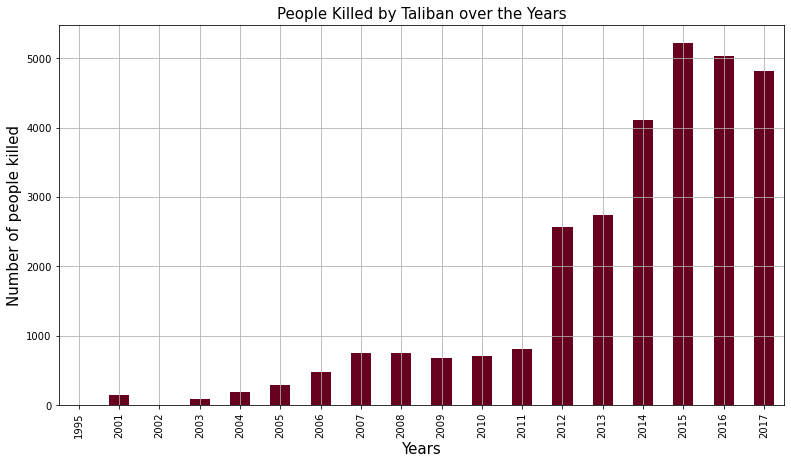

In [35]:
plt.figure(figsize=(13,7))
terr_df_tal.groupby(['Year'])['Killed'].sum().plot(kind='bar',colormap='RdBu')
plt.title('People Killed by Taliban over the Years',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of people killed',fontsize=15)
plt.xticks(rotation=90)
plt.grid()
plt.show()

Taliban killed more than 5000 people during 2015 after that a decreasing trend could be seen but still the numbers are very high.

In [36]:
# creating new dataframe for the year 2014
terr_df_2014 = terr_df[terr_df.Year == 2014]

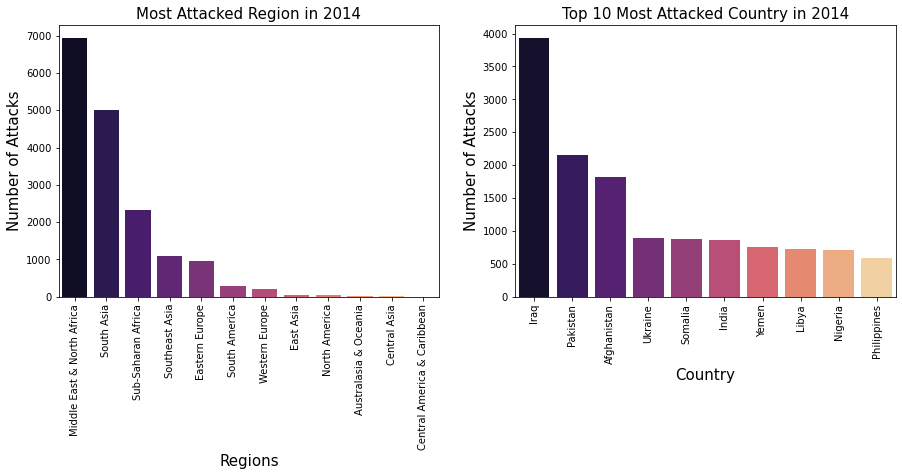

In [38]:
# Regions that were attacked most in 2014
plt.subplot(1,2,1)
sns.barplot(terr_df_2014['Region'].value_counts().index,terr_df_2014['Region'].value_counts().values,palette='magma')
plt.title('Most Attacked Region in 2014',fontsize=15)
plt.xlabel('Regions',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=90)

# top 10 countries that were attacked most in 2014
plt.subplot(1,2,2)
sns.barplot(terr_df_2014['Country'].value_counts().head(10).index,terr_df_2014['Country'].value_counts().head(10).values,palette='magma')
plt.title('Top 10 Most Attacked Country in 2014',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

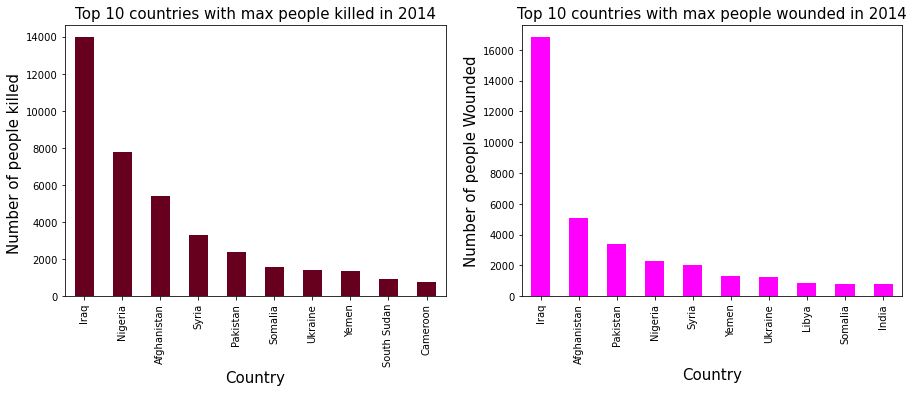

In [39]:
plt.subplot(1,2,1)
terr_df_2014.groupby(['Country'])['Killed'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='RdBu')
plt.title('Top 10 countries with max people killed in 2014',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of people killed ',fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
terr_df_2014.groupby(['Country'])['Wounded'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='spring')
plt.title('Top 10 countries with max people wounded in 2014',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of people Wounded',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

# Conclusion

Private Citizens and Property were attacked most followed by Military, Police, Government and so on.

Middle East & North Africa was most affected among the top affected region. Most of the people in this region were either wounded or killed.

Iraq was the country which was most affected by terror attacks and had maximum number of killed and wounded people.

The State and City that was most affected was Baghdad

In the last decade 2014 had most number of terror attacks. That was around 16500 attacks during this year which means on average 45 attacks per day.

The most common attack type was Bombing/Explosion.

Explosives have been consistently the most popular weapon of choice for terrorists.

Taliban became more active since 2012 and they are responsible for the most of the terror attacks


# Recommendation

Since Private Citizens and Property are being targeted consistently so stronger security and surveillance should be provided, especially in the dense populated regions.

More surveillance is required especially in the Middle East & North African Regions.

Strict border policy should be implemented to prevent the movement of explosives between the regions.
 